## <center> ------------------ABOUT SYNTHETIC DNA IN 3D------------------ </center>

In [7]:
from numpy import sin, cos, pi, linspace
from numpy.random import default_rng
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

In [8]:
def plotting_DNA3(n_samples=300, length = 3):
    # ВЫЧИСЛЕНИЯ
    param_noise, nat_noise, a = '-0.1, 0.1', 'uniform', 0.5
    rng = default_rng(); new_n_samples = int(n_samples * (length + 1) / length)
    
    tic = time.process_time(); ind_pi = 0    
    u = linspace(0, (length+1)*pi, new_n_samples)
    while u[ind_pi] < pi: ind_pi += 1
    beg, end = ind_pi, len(u) - ind_pi
    
    x, y, z = a * cos(u), a * sin(u), u / pi   
    
    x_nod, y_nod, z_nod = [], [], []
    for i in range(new_n_samples):
        for axis_nod_i, axis_i in zip([x_nod, y_nod, z_nod], [x, y, z]):
            axis_nod_i.append(axis_i[i] + eval('rng.' + nat_noise + '(' + param_noise + ')'))
           
    toc = time.process_time()
    print(f"Вычисление заняло {toc - tic:0.4f} секунд")
    
    # ГРАФИКИ
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(1, 2, 1, projection='3d')        
    ax.plot3D(x[:end], y[:end], z[:end])
    ax.plot3D(x[beg:], y[beg:], z[:end])
    ax.scatter(x_nod[:end], y_nod[:end], z_nod[:end])
    ax.scatter(x_nod[beg:], y_nod[beg:], z_nod[:end])
    plt.title('TWO TWISTING CURVES CLOSE BY')

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot3D(x[:end], y[:end], z[:end])
    ax.plot3D(x[beg:], y[beg:], z[:end])
    ax.scatter(x_nod[:end], y_nod[:end], z_nod[:end])
    ax.scatter(x_nod[beg:], y_nod[beg:], z_nod[:end])
    plt.xlim([-4, 4]); plt.ylim([-4, 4])
    plt.title('TWO TWISTING CURVES IN THE DISTANCE')
    plt.show()
    
    return toc - tic

Вычисление заняло 0.0312 секунд


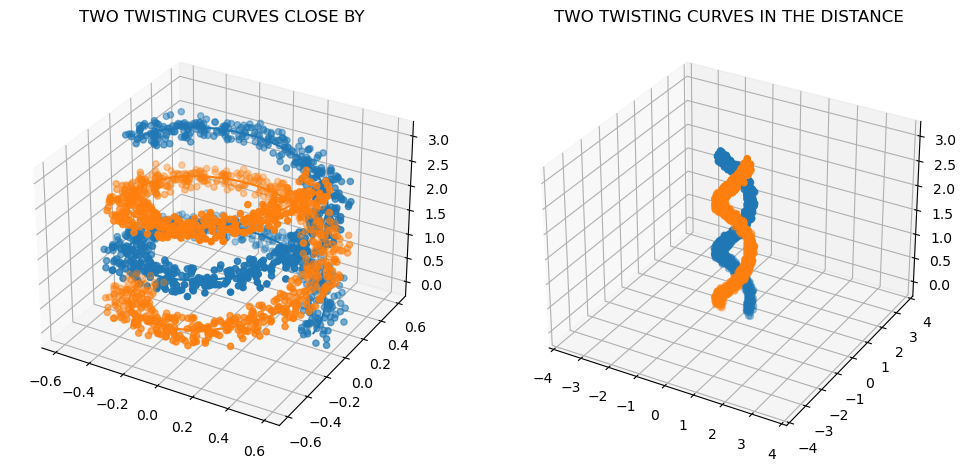

0.03125

In [9]:
plotting_DNA3(1000, 3)